# Deep learning (DL) with tensorflow: how to load multiple images in a folder/directory
* **I am developing this as I learn along so this page should be seen as work in progress....**

In [1]:
# Import required libraries
import tensorflow as tf #Load tensorflow library
import numpy as np #Load numpy library
import matplotlib.pyplot as plt2 #Load matplotlib library
import os # Python’s OS (Operating System) module works as an interface between the Python Programming Language and the Host Operating System
import cv2 # install using: pip install opencv-python
import PIL #PIL stands for Python imaging Library). Can be installed by using: pip install Pillow. Handling image loading and showing images
import pathlib # object oriented file system paths
from tensorflow.keras.preprocessing import image # import keras library for loading image

## Use keras to load single image

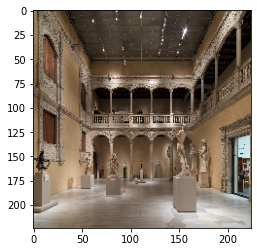

In [2]:
single_file = 'data/Castle.jpg' # set location of a single file
img = image.load_img(single_file, target_size = (224, 224)) #Load image
plt2.imshow (img) # This is a castle but has been labelled/predicted as palace.

# How to load more images from directory using keras/tensorflow


## Directory containing a mix of cats and dogs images (two each). 
* Data downloaded from [Microsoft's Kaggle Cats and Dogs Dataset](https://www.microsoft.com/en-us/download/details.aspx?id=54765)
* Data located in C:\Users\u1770555\OneDrive - University of Warwick\IDG\Projects\HPC ML for Arts proposal\workspace\preparation\datadirectory

In [3]:
#C:\Users\u1770555\OneDrive - University of Warwick\IDG\Projects\HPC ML for Arts proposal\workspace\preparation\datadirectory
#Direcotry containing a mix of cats and dogs images (two each). Data downloaded from [Microsoft's Kaggle Cats and Dogs Dataset](https://www.microsoft.com/en-us/download/details.aspx?id=54765)
DATADIR = "C:/Users/u1770555/OneDrive - University of Warwick/IDG/Projects/HPC ML for Arts proposal/workspace/preparation/datadirectory"
DATADIR = pathlib.Path(DATADIR)

In [4]:
# Define some parameters for the loader:
batch_size = 4
img_height = 180
img_width = 180

In [5]:
image_count = len(list(DATADIR.glob('*.jpg'))) #count the number of images in the directory
print(image_count) #print the number to check

4


In [6]:
#Since there are no sub-directories to allow inference or to be used as classes, we will set Lables=None. You can read more about the parameters here (https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory).
image_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  labels=None,
  class_names=None,
  color_mode='rgb',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4 files belonging to 1 classes.


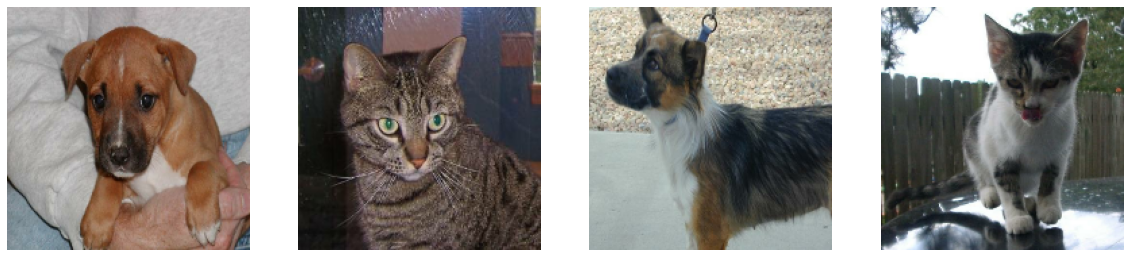

In [7]:
#Visualize the data
#import matplotlib.pyplot as plt2

plt2.figure(figsize=(20, 20)) # define the size of the figures to show
for images in image_ds.take(1):
  for i in range(4):
    ax = plt2.subplot(1, 4, i + 1)
    plt2.imshow(images[i].numpy().astype("uint8"))
    plt2.axis("off")

## The plan, in the next example codes, is to use Keras models with highest "Top-1 Accuracy" values based on ImageNet data. 
[See available Keras models](https://keras.io/api/applications/#usage-examples-for-image-classification-models)
* [NASNetLarge](https://keras.io/api/applications/nasnet/#nasnetlarge-function)  with Top-1 Accuracy of 0.825) 
* [InceptionResNetV2](https://keras.io/api/applications/inceptionresnetv2) with Top-1 Accuracy of 0.803)

I will start with mobilenet pre-trained model as an initial example; I have learned this a bit before the above ones so I pref to start with that first.

## Predicting with MobileNetV2 pre-trained model for only one image

In [8]:
mobilev2 = tf.keras.applications.mobilenet_v2.MobileNetV2() # call mobilenetv2 pre-trained (or weights) algorithm or architecture
resized_img = image.img_to_array (img) # convert image to arraw
final_image = np.expand_dims(resized_img, axis =0) ## add forth dimension for the RGB layers. # for DL architecture, we need forth dimension and that's why numpy arrays become useful. This is in final_image
final_image = tf.keras.applications.mobilenet.preprocess_input(final_image) # add pre-processed image as input to the model.Very important, otherwise poor accuracy will be achieved.
resized_img.shape # check shape of resized image
mobilenetv2_predictions = mobilev2.predict(final_image) # predict without any labels provided
mobilenetv2_results = tf.keras.applications.imagenet_utils.decode_predictions(mobilenetv2_predictions) # decode the predictions to human readable form using imagenet_utils
print(mobilenetv2_results) # print the results to the console to read

[[('n03877845', 'palace', 0.81653136), ('n03781244', 'monastery', 0.05579633), ('n04523525', 'vault', 0.04664533), ('n04005630', 'prison', 0.016833227), ('n03788195', 'mosque', 0.005178249)]]


## Predicting with NASNetLarge pre-trained model for only one image

## Predicting with **InceptionResNetV2* pre-trained model for only one image

## Predicting with MobileNetV2 pre-trained model for more images

## Predicting with NASNetLarge pre-trained model for more images

## Predicting with InceptionResNetV2 pre-trained model for more images